In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def normalization(data):
    _range = np.max(data) - np.min(data)
    return (data - np.min(data)) / _range

(3, 4)
(2, 21)
(7, 22)
(21, 12)
(9, 9)
(5, 9)
(10, 15)
(14, 16)
(16, 14)
(11, 22)
(12, 20)
(17, 8)
(30, 9)
(6, 15)
(28, 6)
(7, 19)
(14, 7)
(11, 2)
(13, 10)
(31, 7)


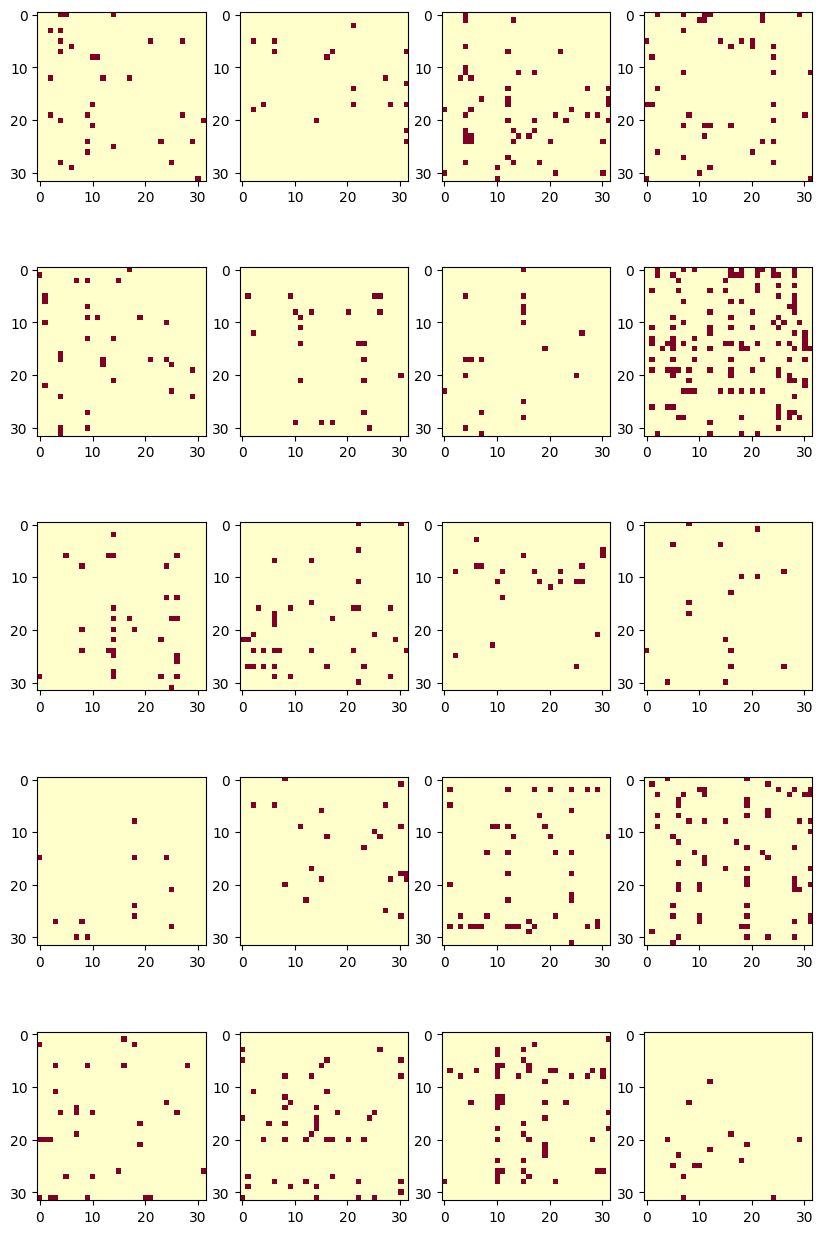

In [30]:
directory = './Weight'

fig, axes = plt.subplots(figsize=(10,16),nrows=5, ncols=4)
i = 0
for item in os.listdir(directory):
    if os.path.isfile(os.path.join(directory, item)) and item.__contains__('A'):
        weight=np.load(os.path.join(directory, item))
        max_index = np.unravel_index(np.argmax(weight, axis=None), weight.shape)
        print(max_index)
        weight=normalization(weight)
        binary_weight = (weight > 0.8).astype(int)
        ax = axes[int(i/4), i%4]
        im = ax.imshow(binary_weight, cmap='YlOrRd')
        # plt.colorbar(im)
        i = i+1

In [ ]:
directory = './Weight'

fig, axes = plt.subplots(figsize=(10,16),nrows=5, ncols=4)
i = 0
for item in os.listdir(directory):
    
    if os.path.isfile(os.path.join(directory, item)):
        weight=np.load(os.path.join(directory, item))
        if item.__contains__('A'):
        
        
        max_index = np.unravel_index(np.argmax(weight, axis=None), weight.shape)
        print(max_index)
        weight=normalization(weight)
        binary_weight = (weight > 0.8).astype(int)
        ax = axes[int(i/4), i%4]
        im = ax.imshow(binary_weight, cmap='YlOrRd')
        # plt.colorbar(im)
        i = i+1
        ['14_0.48', '15_0.24', '16_0.31', '17_0.28', '18_0.18',
              '20_0.25', '9_0.27', '4_0.32',]  # 有module '1_0.22',
# loss_model = ['2_0.44', '10_0.23', '12_0.44', '13_0.19','26_0.29', '29_0.21', '32_0.48', '3_0.25', '7_0.22',]

In [196]:
subjects = ['1', '2','3', '4', '7', '9','10','12', '13', '14', '15', '16','17','18','20',]#'26', '29', '32'
num_kernel = 4
directory = './Weight'
s_Adj = []
for s in subjects:
    threeDA=np.zeros((32*3, 32*3))
    for i in range(num_kernel):
        threeDA_kernel=np.zeros((32*3, 32*3))
        for item in os.listdir(directory):
            if item.startswith(f'exp{s}-{i}'):
                weight=np.load(os.path.join(directory, item))
                weight=normalization(weight)
                # weight = (weight > 0.8).astype(int)
                if item.__contains__('A'):
                    threeDA_kernel[0:32, 0:32]=weight
                    threeDA_kernel[32:32*2, 32:32*2]=weight
                    threeDA_kernel[32*2:32*3, 32*2:32*3]=weight
                elif item.endswith('cross_time.npy'):
                    threeDA_kernel[0:32, 32:32*2]=np.squeeze(weight[0,])
                    threeDA_kernel[32:32*2, 0:32]=np.squeeze(weight[0,])
                    threeDA_kernel[32:32*2, 32*2:32*3]=np.squeeze(weight[1,])
                    threeDA_kernel[32*2:32*3, 32:32*2]=np.squeeze(weight[1,])  # 对称分块矩阵
                elif item.endswith('cross_time2.npy'):
                    threeDA_kernel[0:32, 32*2:32*3]=weight
                    threeDA_kernel[32*2:32*3, 0:32]=weight
        threeDA+=threeDA_kernel
    s_Adj.append(threeDA)
                
                
    

In [197]:
len(s_Adj)


15

In [198]:
connect=np.zeros((96,96))
for s in range(len(s_Adj)):
    matrix = s_Adj[s]
    flattened = matrix.flatten()
    indices = np.argpartition(flattened, -20)[-20:]
    top_indices = indices[np.argsort(-flattened[indices])]
    top_positions = np.unravel_index(top_indices, matrix.shape)
    for i, pos in enumerate(zip(top_positions[0], top_positions[1])):
        print(f"Top {i+1}: Value = {matrix[pos]}, Position = {pos}")
        connect[pos] += 1
    

Top 1: Value = 3.1979633569717407, Position = (6, 57)
Top 2: Value = 3.1979633569717407, Position = (38, 25)
Top 3: Value = 3.0463716983795166, Position = (75, 80)
Top 4: Value = 3.0463716983795166, Position = (43, 48)
Top 5: Value = 3.0463716983795166, Position = (11, 16)
Top 6: Value = 3.03133761882782, Position = (15, 10)
Top 7: Value = 3.03133761882782, Position = (47, 42)
Top 8: Value = 3.03133761882782, Position = (79, 74)
Top 9: Value = 3.007935583591461, Position = (59, 95)
Top 10: Value = 3.007935583591461, Position = (91, 63)
Top 11: Value = 3.0048611164093018, Position = (44, 3)
Top 12: Value = 3.0048611164093018, Position = (12, 35)
Top 13: Value = 2.997379720211029, Position = (37, 70)
Top 14: Value = 2.997379720211029, Position = (69, 38)
Top 15: Value = 2.965039551258087, Position = (59, 66)
Top 16: Value = 2.965039551258087, Position = (91, 34)
Top 17: Value = 2.927317976951599, Position = (59, 42)
Top 18: Value = 2.927317976951599, Position = (27, 10)
Top 19: Value = 2

Top 1: Value = 2.0, Position = (71, 70)
Top 2: Value = 2.0, Position = (27, 10)
Top 3: Value = 2.0, Position = (24, 88)
Top 4: Value = 2.0, Position = (39, 38)
Top 5: Value = 2.0, Position = (88, 24)
Top 6: Value = 2.0, Position = (7, 6)
Top 7: Value = 2.0, Position = (59, 42)
Top 8: Value = 1.0, Position = (49, 36)
Top 9: Value = 1.0, Position = (11, 19)
Top 10: Value = 1.0, Position = (19, 22)


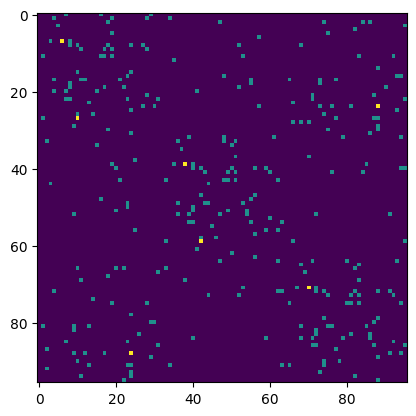

In [199]:
plt.imshow(connect)
flattened = connect.flatten()
indices = np.argpartition(flattened, -10)[-10:]
top_indices = indices[np.argsort(-flattened[indices])]
top_positions = np.unravel_index(top_indices, connect.shape)
for i, pos in enumerate(zip(top_positions[0], top_positions[1])):
    print(f"Top {i+1}: Value = {connect[pos]}, Position = {pos}")

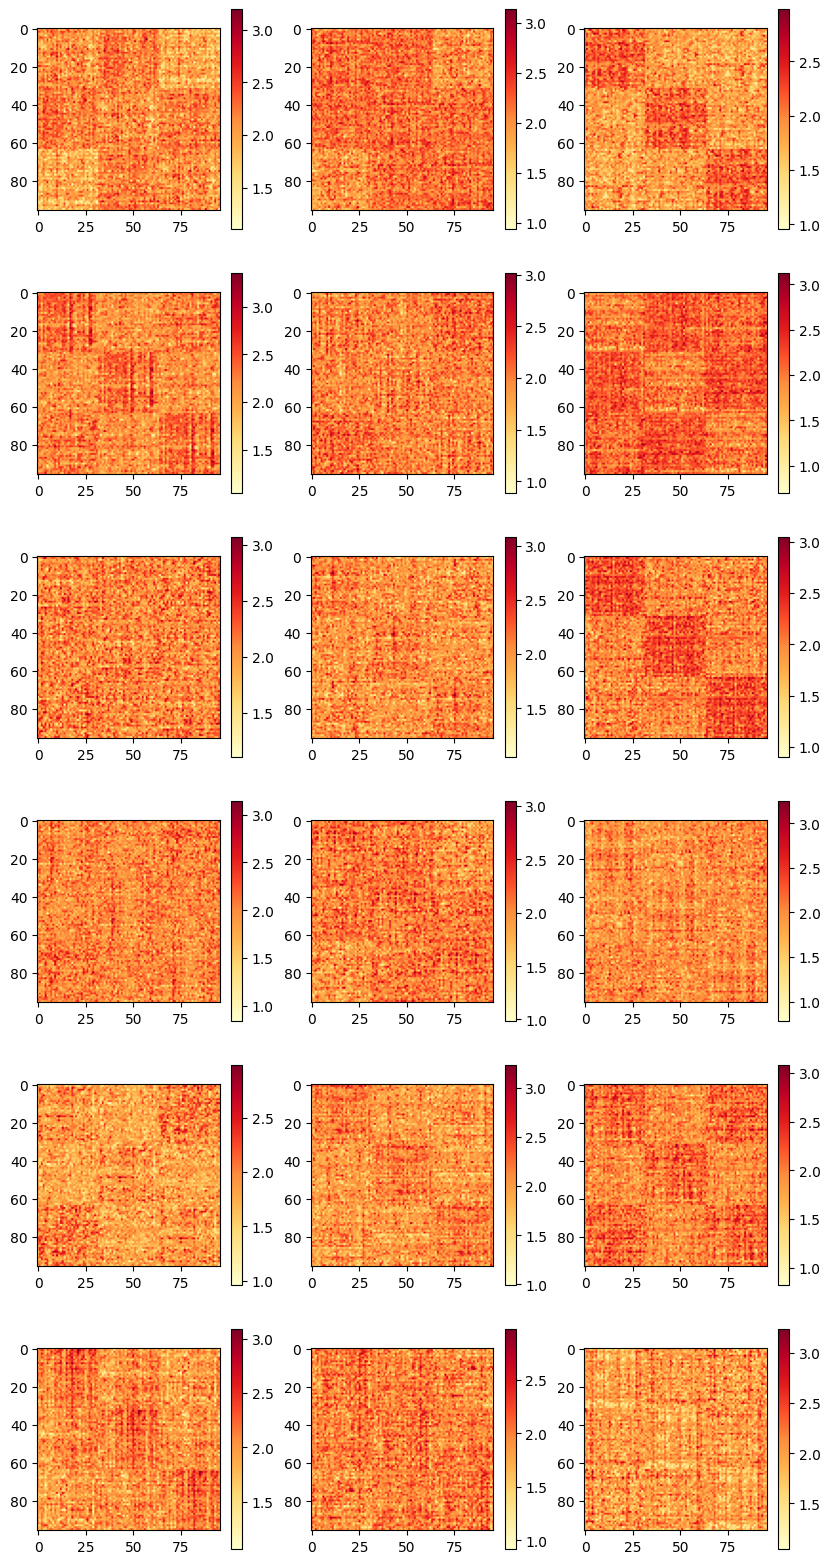

In [107]:
fig, axes = plt.subplots(figsize=(10,20),nrows=6, ncols=3)
for i in range(len(s_Adj)):
    ax = axes[i//3, i%3]
    im = ax.imshow(s_Adj[i], cmap='YlOrRd')
    fig.colorbar(im)
plt.savefig('adjacency.pdf')

起码说明效应连接对分类很有帮助，占了很大的比重

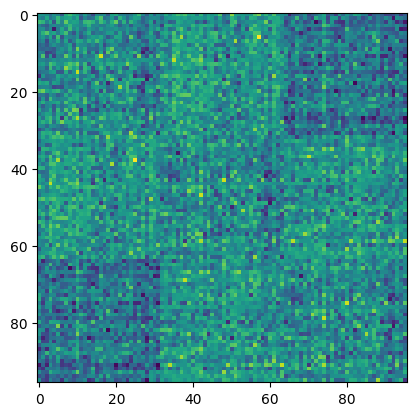

In [37]:
plt.imshow(s_Adj[0])

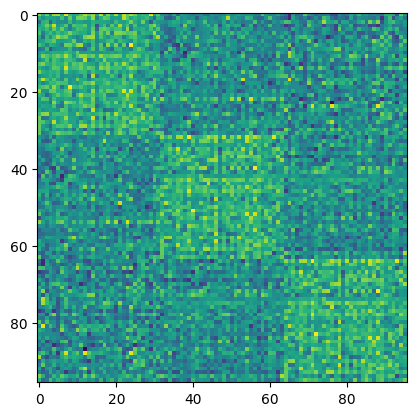

In [38]:
plt.imshow(s_Adj[3])

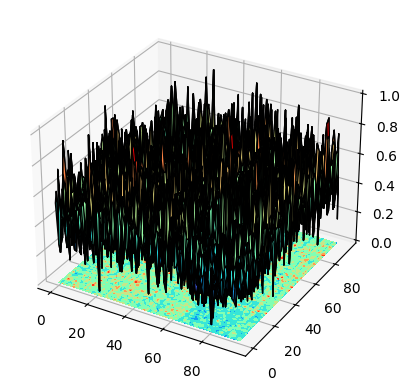

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(num=1)
ax = fig.add_subplot(111, projection='3d')

X = np.arange(0,96,1)
Y = np.arange(0,96,1)
X,Y = np.meshgrid(X,Y)
Z = s_Adj[0]

ax.plot_surface(X,Y,Z,rstride=1,cstride=1,edgecolor='black',cmap=plt.get_cmap('rainbow'))
ax.contourf(X,Y,Z,zdir='z',offset=0,cmap='rainbow')
plt.show()


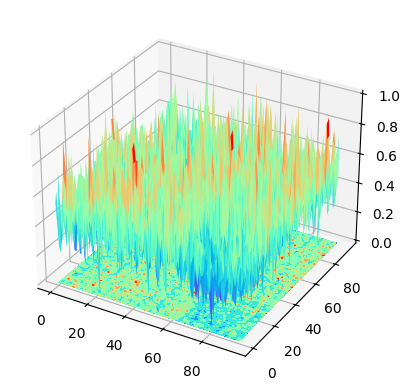

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(num=1)
ax = fig.add_subplot(111, projection='3d')

# 增加分辨率
X = np.arange(0, 96, 1)
Y = np.arange(0, 96, 1)
X, Y = np.meshgrid(X, Y)
Z = s_Adj[0]  # 确保这里的Z是正确的二维数组

# 绘制光滑曲面
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, edgecolor='none', cmap=plt.get_cmap('rainbow'), antialiased=True)

# 增加等高线
ax.contourf(X, Y, Z, zdir='z', offset=0, cmap='rainbow')
plt.show()


In [90]:
import numpy as np
from scipy.interpolate import griddata

# 假设 original_matrix 是你的 96x96 矩阵
# original_matrix = np.random.rand(96, 96)  # 示例数据

# 创建原始点集的坐标
x = np.arange(0, s_Adj[0].shape[0])
y = np.arange(0, s_Adj[0].shape[1])
x, y = np.meshgrid(x, y)
points = np.c_[x.ravel(), y.ravel()]

# 获取原始点集的值
values = s_Adj[0].ravel()

# 定义新的插值网格
grid_x, grid_y = np.mgrid[0:95:192j, 0:95:192j]

# 进行插值
interpolated_matrix = griddata(points, values, (grid_x, grid_y), method='cubic')

# interpolated_matrix 现在是一个 192x192 的矩阵，它是对 original_matrix 的插值


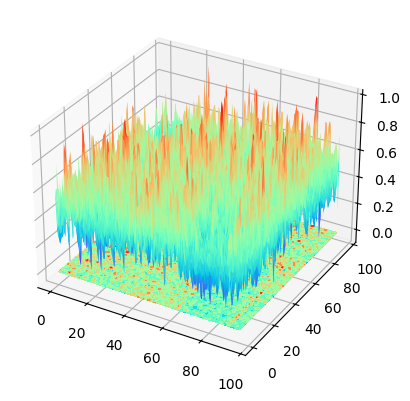

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(num=1)
ax = fig.add_subplot(111, projection='3d')

# 增加分辨率
X = np.arange(0, 96, 0.5)
Y = np.arange(0, 96, 0.5)
X, Y = np.meshgrid(X, Y)
Z = interpolated_matrix  # 确保这里的Z是正确的二维数组

# 绘制光滑曲面
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, edgecolor='none', cmap=plt.get_cmap('rainbow'), antialiased=True)

# 增加等高线
ax.contourf(X, Y, Z, zdir='z', offset=0, cmap='rainbow')
plt.show()

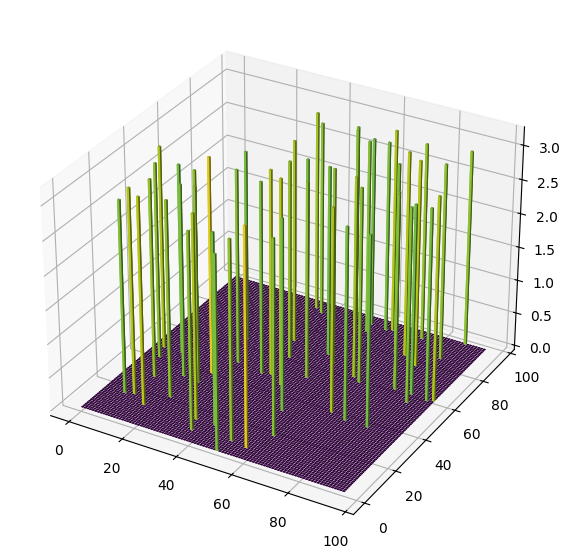

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D bar plot
x_data, y_data = np.meshgrid(np.arange(s_Adj[0].shape[0]), np.arange(s_Adj[0].shape[1]))
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = np.zeros_like(x_data)

dx = dy = 0.8
matrix = np.where(s_Adj[0]<2.8, 0, s_Adj[0])
dz = matrix.flatten()

# Normalize the colors based on the value of the bars
norm = plt.Normalize(s_Adj[0].min(), s_Adj[0].max())
colors = plt.cm.viridis(norm(dz))

ax.bar3d(x_data, y_data, z_data, dx, dy, dz, color=colors)

# Show the plot
plt.show()


# t-SNE


In [201]:
s = 's01'
label = np.load(f'./Topo_data/{s}-labels.npy')
all_labels = []
for i in range(label.shape[0]):
    if 1 <= label[i, 0] <= 5 and 1 <= label[i, 1] <= 5:
        all_labels.append(1)
    elif 5 < label[i, 0] <= 9 and 1 <= label[i, 1] <= 5:
        all_labels.append(2)
    elif 1 <= label[i, 0] <= 5 and 5 < label[i, 1] <= 9:
        all_labels.append(3)
    elif 5 < label[i, 0] <= 9 and 5 < label[i, 1] <= 9:
        all_labels.append(4)

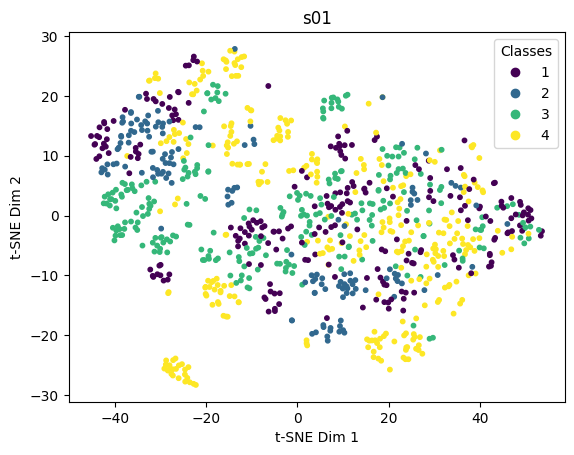

In [249]:
original = np.load(f'./Topo_data/{s}-original.npy')
# print(original.shape)
reshaped_data = original.reshape(960, -1) 
fig = plt.figure()
tsne = TSNE(n_components=2)  # 降维到2维
tsne_results = tsne.fit_transform(reshaped_data)
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=10, c=all_labels,)

legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")

plt.xlabel('t-SNE Dim 1')
plt.ylabel('t-SNE Dim 2')
plt.title(f'{s}')
plt.show()

(960, 32, 128)


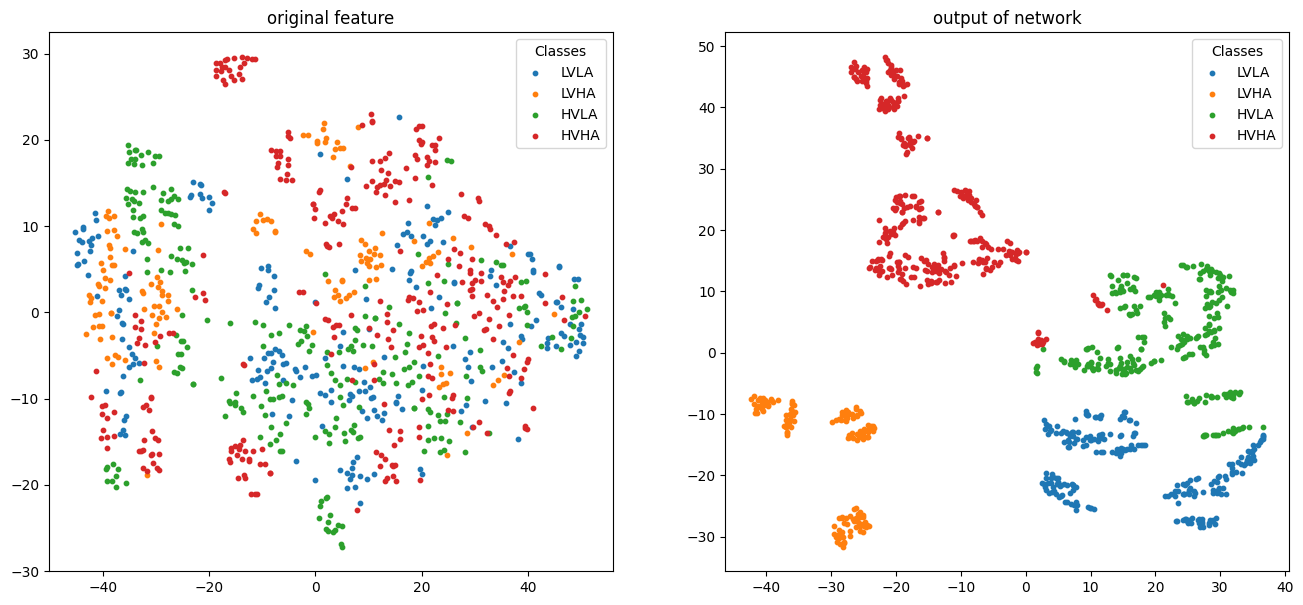

In [261]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
lev=['LVLA', 'LVHA','HVLA','HVHA']
data1 = np.load(f'./Topo_data/{s}-original.npy')
data2 = np.load(f'./Topo_data/tSNE/{s}/train_data.npy')
print(data2.shape)
reshaped_data1 = data1.reshape(960, -1) 
reshaped_data2 = data2.reshape(960, -1)
fig, (ax1, ax2) = plt.subplots(figsize=(16,7), ncols=2)
tsne1 = TSNE(n_components=2)  # 降维到2维
tsne_results1 = tsne1.fit_transform(reshaped_data1)
tsne2 = TSNE(n_components=2)  # 降维到2维
tsne_results2 = tsne2.fit_transform(reshaped_data2)


for i, label in enumerate(lev):
    idx = (np.array(all_labels)-1) == i 
    ax1.scatter(tsne_results1[idx, 0], tsne_results1[idx, 1], s=10, label = label)
    ax2.scatter(tsne_results2[idx, 0], tsne_results2[idx, 1], s=10, label = label)
    
ax1.legend(loc="upper right", title="Classes")
ax2.legend(loc="upper right", title="Classes")
# scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=10, c=all_labels, label = lev[label-1])

ax1.set_title('original feature')
ax2.set_title('output of network')
plt.savefig('tSNE.pdf')
plt.show()


(960, 32, 128)


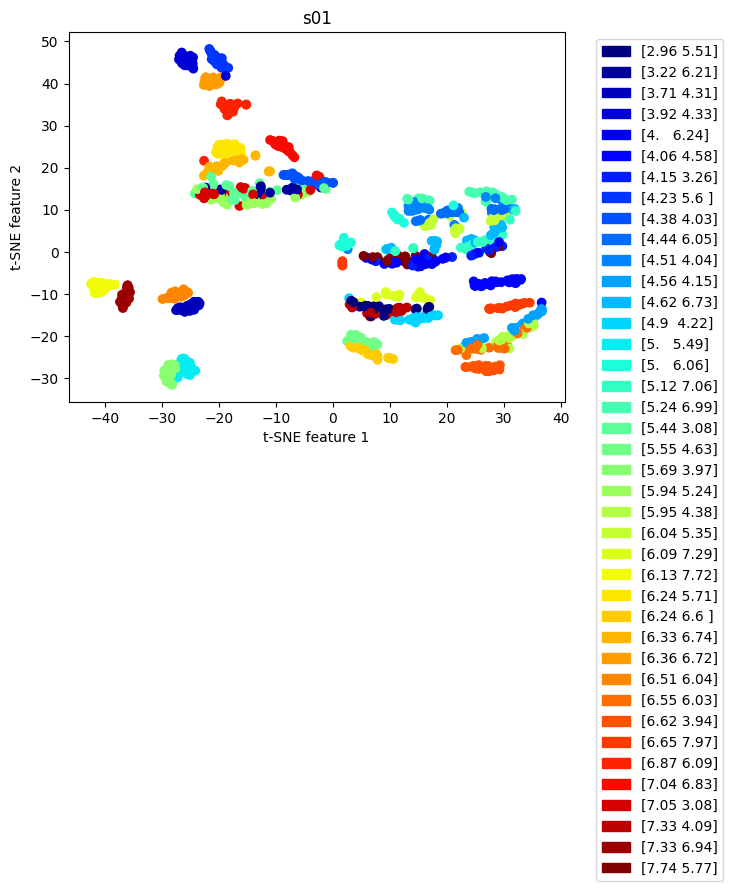

In [141]:
s = 's01'
data = np.load(f'./Topo_data/tSNE/{s}/train_data.npy')
print(data.shape)
reshaped_data = data.reshape(960, -1)  
num_colors = 40
colors = plt.cm.jet(np.linspace(0, 1, num_colors))

tsne = TSNE(n_components=2) 
tsne_results = tsne.fit_transform(reshaped_data)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colored_labels, )
legend_handles = [mpatches.Patch(color=color, label=unique_rows[i]) for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.title('s01')
plt.show()


/var/folders/15/d235_l5d2pj82cj7nsxphz080000gn/T/ipykernel_7983/2760350479.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap('jet', num_labels)


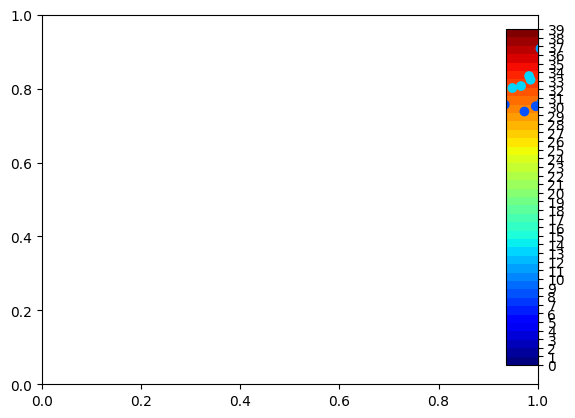

In [155]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

# 标签数量
num_labels = 40

# 创建图和轴
fig, ax = plt.subplots()

# 生成颜色
jet = cm.get_cmap('jet', num_labels)

# 创建 ScalarMappable
norm = colors.Normalize(vmin=0, vmax=num_labels-1)
sm = cm.ScalarMappable(cmap=jet, norm=norm)
sm.set_array([])

# 创建用于 colorbar 的 Axes
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7])  # [left, bottom, width, height]

# 绘制 colorbar
cbar = plt.colorbar(sm, cax=cax, ticks=np.arange(num_labels))

plt.show()
